In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

Load the Data

In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

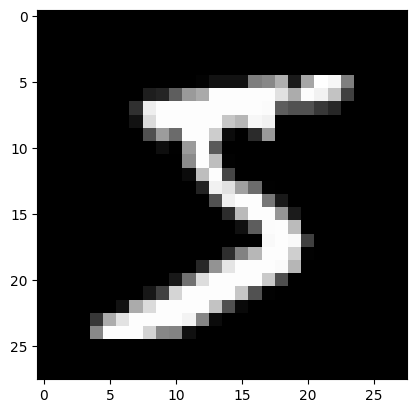

In [ ]:
plt.imshow(x_train[0],cmap='gray');

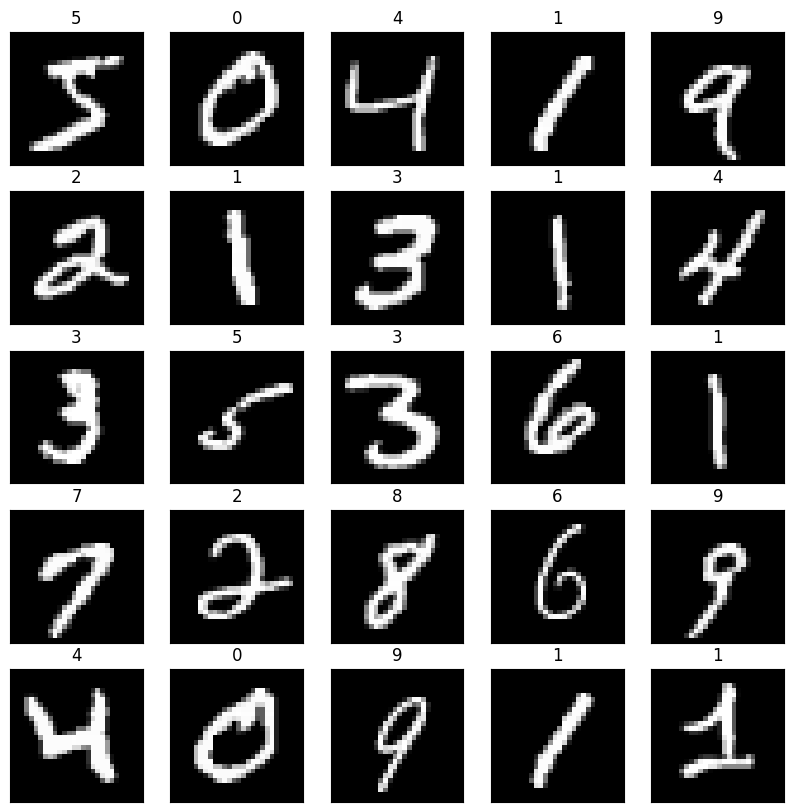

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.xticks([]); plt.yticks([])
  plt.title(y_train[i])

## Flatten the data

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0].size

784

In [ ]:
size = x_train[0].size

In [ ]:
x_train = x_train.reshape(-1,size)
x_test = x_test.reshape(-1,size)

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### Prepare output variable

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

# Build the MODEL

In [ ]:
model = Sequential()

model.add(Dense(size, input_shape = (size,), activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

## Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

## Train the model

In [ ]:
model.fit(x_train,y_train,batch_size=10, epochs=10)

Epoch 1/10
6000/6000 [==============================] - 33s 5ms/step - loss: 1.1594 - accuracy: 0.8399
Epoch 2/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.3211 - accuracy: 0.9247
Epoch 3/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.2531 - accuracy: 0.9453
Epoch 4/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.2183 - accuracy: 0.9523
Epoch 5/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.2301 - accuracy: 0.9496
Epoch 6/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.2289 - accuracy: 0.9503
Epoch 7/10
6000/6000 [==============================] - 18s 3ms/step - loss: 0.2168 - accuracy: 0.9534
Epoch 8/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.2283 - accuracy: 0.9494
Epoch 9/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.2298 - accuracy: 0.9488
Epoch 10/10
6000/6000 [==============================] - 19s 3ms/step - l

### Evaluate on the test data

In [ ]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 27s 3ms/step - loss: 0.3855 - accuracy: 0.9410


[0.38552287220954895, 0.9409999847412109]

In [ ]:
img = x_test[578]
img = img.reshape(28,28)

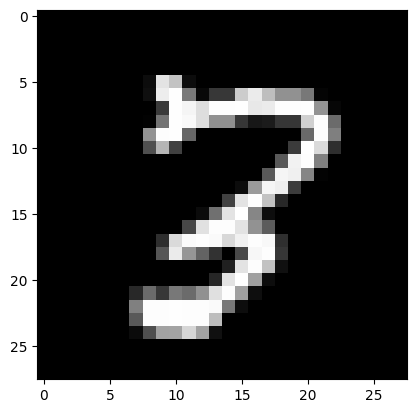

In [ ]:
plt.imshow(img,cmap='gray');

In [ ]:
img = x_test[578]
img = img.reshape(28,28)

In [ ]:
img = img / 255
img = img.reshape(1,size)
result = model.predict(img,verbose=0)
print(np.argmax(result))

3
